# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
cities

['yellowknife',
 'hobyo',
 'edinburgh of the seven seas',
 'yatou',
 'amga',
 'waitangi',
 'tiksi',
 'touros',
 'craig',
 'haiku-pauwela',
 'daru',
 'guerrero negro',
 'grytviken',
 'saint-francois',
 'iskateley',
 'vorkuta',
 'adamstown',
 'avarua',
 'ilulissat',
 'klyuchi',
 'hamilton',
 'puerto ayora',
 'senador guiomard',
 'blackmans bay',
 'arraial do cabo',
 'nabinagar',
 'invercargill',
 'lihue',
 'atafu village',
 'dudinka',
 'west island',
 'hermanus',
 'ardmore',
 'ushuaia',
 'xiaoweizhai',
 'walvis bay',
 'san andres',
 'broome',
 'east ballina',
 "bol'shoye murashkino",
 'mount pearl',
 'rikaze',
 'bingerville',
 'port-aux-francais',
 'celestun',
 "'ohonua",
 'bethel',
 'margaret river',
 'lensk',
 'hithadhoo',
 'port mathurin',
 'seydi',
 'hawaiian paradise park',
 'port elizabeth',
 'lubao',
 'huinca renanco',
 'puerto natales',
 'tadine',
 'hola',
 'tura',
 'antofagasta',
 'bilibino',
 'ciudad de chiautla de tapia',
 'paracuru',
 'ta`u',
 'petropavlovsk-kamchatsky',
 'ta

In [6]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | hobyo
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | yatou
Processing Record 5 of Set 1 | amga
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | craig
Processing Record 10 of Set 1 | haiku-pauwela
Processing Record 11 of Set 1 | daru
Processing Record 12 of Set 1 | guerrero negro
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | saint-francois
Processing Record 15 of Set 1 | iskateley
Processing Record 16 of Set 1 | vorkuta
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | klyuchi
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Se

Processing Record 38 of Set 4 | san alejo
Processing Record 39 of Set 4 | bairnsdale
Processing Record 40 of Set 4 | mejit
Processing Record 41 of Set 4 | ryotsu-minato
Processing Record 42 of Set 4 | masaka
Processing Record 43 of Set 4 | kailua-kona
Processing Record 44 of Set 4 | trujillo
Processing Record 45 of Set 4 | mandalgovi
Processing Record 46 of Set 4 | punta arenas
Processing Record 47 of Set 4 | kingston
Processing Record 48 of Set 4 | usinsk
Processing Record 49 of Set 4 | salair
Processing Record 0 of Set 5 | waingapu
Processing Record 1 of Set 5 | newman
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | praia da vitoria
Processing Record 4 of Set 5 | belo sur tsiribihina
Processing Record 5 of Set 5 | mahalingpur
Processing Record 6 of Set 5 | sale
Processing Record 7 of Set 5 | constantia
Processing Record 8 of Set 5 | san antonio de pale
Processing Record 9 of Set 5 | frederico westphalen
Processing Record 10 of Set 5 | tokar
Processing Record 11 o

Processing Record 29 of Set 8 | sungailiat
Processing Record 30 of Set 8 | mulino
Processing Record 31 of Set 8 | muang xay
Processing Record 32 of Set 8 | la sarre
Processing Record 33 of Set 8 | orcopampa
Processing Record 34 of Set 8 | akjoujt
Processing Record 35 of Set 8 | vyborg
Processing Record 36 of Set 8 | weno
Processing Record 37 of Set 8 | nichinan
Processing Record 38 of Set 8 | curillo
Processing Record 39 of Set 8 | glace bay
Processing Record 40 of Set 8 | vilyuchinsk
Processing Record 41 of Set 8 | candido mota
Processing Record 42 of Set 8 | pacific grove
Processing Record 43 of Set 8 | bombarral
Processing Record 44 of Set 8 | wynyard
Processing Record 45 of Set 8 | am djarass
City not found. Skipping...
Processing Record 46 of Set 8 | santa cruz del norte
Processing Record 47 of Set 8 | basco
Processing Record 48 of Set 8 | mbandaka
Processing Record 49 of Set 8 | amahai
Processing Record 0 of Set 9 | la passe
Processing Record 1 of Set 9 | umm kaddadah
Processing 

Processing Record 18 of Set 12 | arroyo
Processing Record 19 of Set 12 | ishim
Processing Record 20 of Set 12 | novohrad-volynskyi
Processing Record 21 of Set 12 | port saint john's
Processing Record 22 of Set 12 | bakchar
Processing Record 23 of Set 12 | shenjiamen
Processing Record 24 of Set 12 | yelizovo
Processing Record 25 of Set 12 | hotan
Processing Record 26 of Set 12 | sokoni
Processing Record 27 of Set 12 | hutchinson island south
Processing Record 28 of Set 12 | keelung
Processing Record 29 of Set 12 | katsuura
Processing Record 30 of Set 12 | solleftea
Processing Record 31 of Set 12 | pontevico
Processing Record 32 of Set 12 | swakopmund
Processing Record 33 of Set 12 | mahabe
City not found. Skipping...
Processing Record 34 of Set 12 | pasvalys
Processing Record 35 of Set 12 | kendari
Processing Record 36 of Set 12 | beoumi
Processing Record 37 of Set 12 | tara
Processing Record 38 of Set 12 | warmbad
Processing Record 39 of Set 12 | san jose village
City not found. Skippi

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,18.29,20,20,6.17,CA,1715295603
1,hobyo,5.3505,48.5268,28.88,81,92,5.02,SO,1715295825
2,edinburgh of the seven seas,-37.0676,-12.3116,12.26,54,87,2.17,SH,1715295826
3,yatou,37.1500,122.3833,15.64,74,46,7.04,CN,1715295826
4,amga,60.8953,131.9608,1.53,50,33,3.01,RU,1715295827


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,18.29,20,20,6.17,CA,1715295603
1,hobyo,5.3505,48.5268,28.88,81,92,5.02,SO,1715295825
2,edinburgh of the seven seas,-37.0676,-12.3116,12.26,54,87,2.17,SH,1715295826
3,yatou,37.1500,122.3833,15.64,74,46,7.04,CN,1715295826
4,amga,60.8953,131.9608,1.53,50,33,3.01,RU,1715295827


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

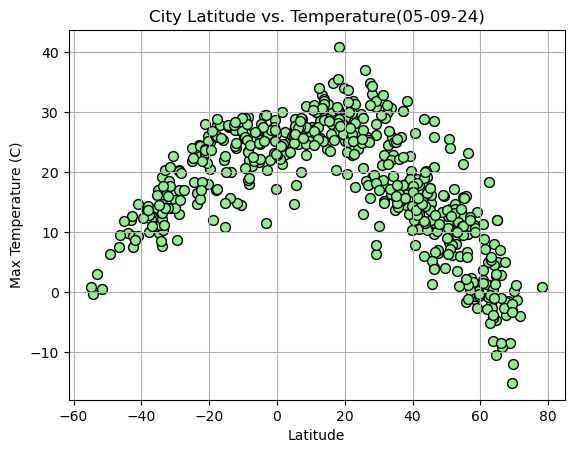

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="lightgreen",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

plt.title("City Latitude vs. Temperature(%s)" %time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

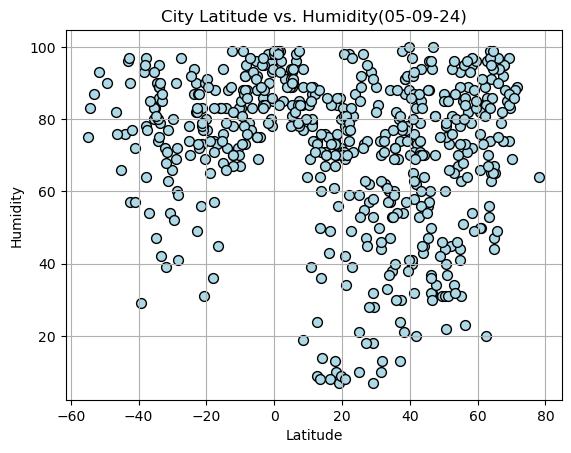

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="lightblue",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

plt.title("City Latitude vs. Humidity(%s)" %time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

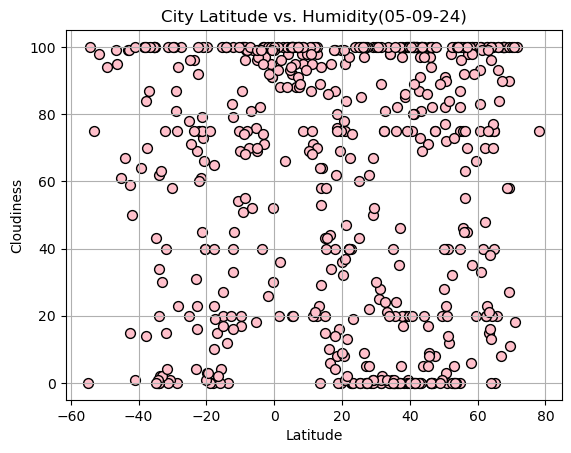

In [22]:
# Build the scatter plots for latitude vs. cloudiness
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="pink",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

plt.title("City Latitude vs. Humidity(%s)" %time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

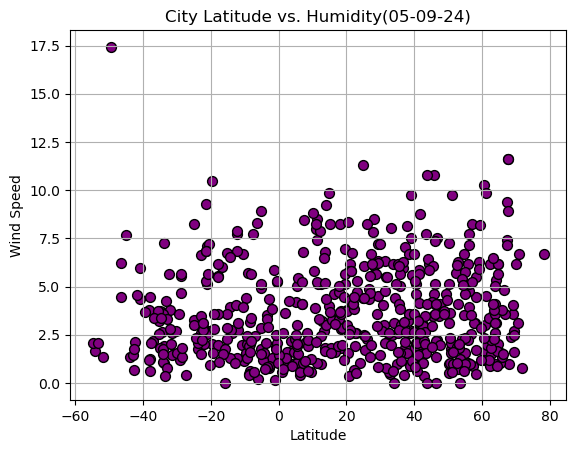

In [35]:
# Build the scatter plots for latitude vs. Wind Speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="purple",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

plt.title("City Latitude vs. Humidity(%s)" %time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values, color=color, edgecolor="black",s=50)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northernHemDF = city_data_df.loc[(city_data_df["Lat"]>=0)]
# Display sample data
northernHemDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,18.29,20,20,6.17,CA,1715295603
1,hobyo,5.3505,48.5268,28.88,81,92,5.02,SO,1715295825
3,yatou,37.1500,122.3833,15.64,74,46,7.04,CN,1715295826
4,amga,60.8953,131.9608,1.53,50,33,3.01,RU,1715295827
6,tiksi,71.6872,128.8694,-3.93,89,100,0.76,RU,1715295828


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southernHemDF = city_data_df.loc[(city_data_df["Lat"]<0)]
# Display sample data
southernHemDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,12.26,54,87,2.17,SH,1715295826
5,waitangi,-43.9535,-176.5597,9.90,76,67,1.34,NZ,1715295827
7,touros,-5.1989,-35.4608,26.27,88,96,4.94,BR,1715295828
10,daru,-9.0763,143.2092,26.51,88,100,5.72,PG,1715295830
12,grytviken,-54.2811,-36.5092,-0.39,83,100,1.64,GS,1715295830


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8356494749087041


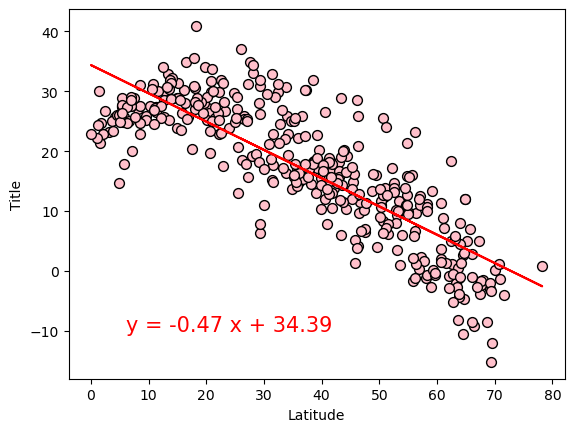

In [44]:
# Linear regression on Northern Hemisphere
x_values = northernHemDF["Lat"]
y_values = northernHemDF["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (6,-10), "pink")

The r-squared is: 0.8011833077094782


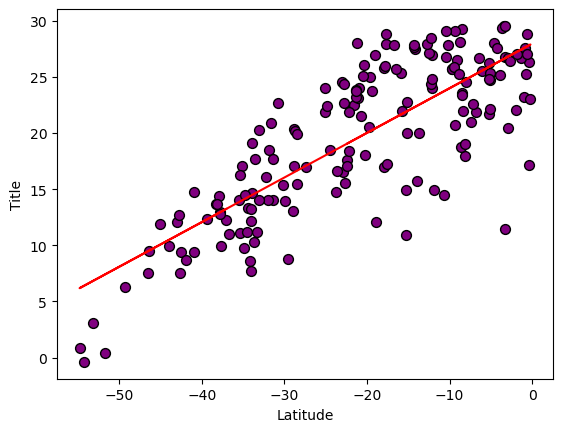

In [48]:
# Linear regression on Southern Hemisphere
x_values = southernHemDF["Lat"]
y_values = southernHemDF["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (-55,90),"purple")

**Discussion about the linear relationship:** The high r values indicate a high positive and negative relationship between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.007250081092025588


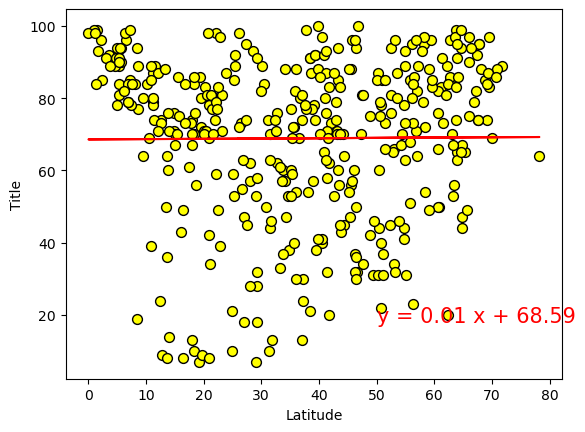

In [67]:
x_values = northernHemDF["Lat"]
y_values = northernHemDF["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity", (50, 18),"yellow")

The r-squared is: 0.22620564277905536


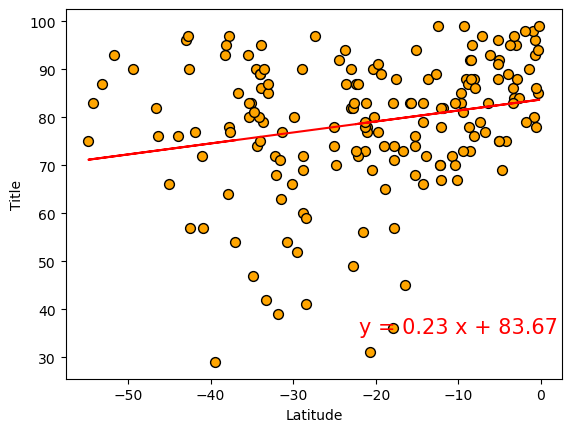

In [63]:
x_values = southernHemDF ["Lat"]
y_values = southernHemDF ["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity", (-22,35),"orange")

**Discussion about the linear relationship:** The low r values indicate a weak positive relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.030721421879773617


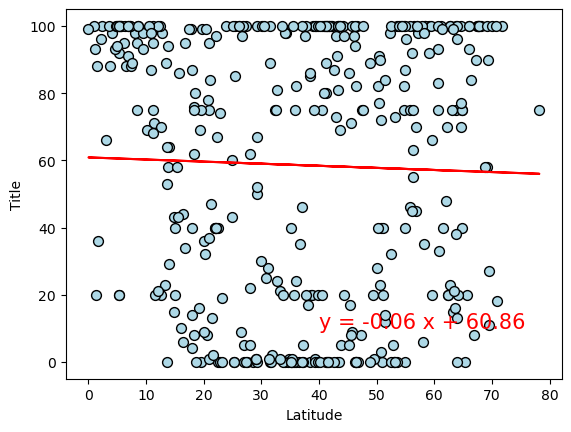

In [55]:
x_values = northernHemDF["Lat"]
y_values = northernHemDF["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness", (40,10),"lightblue")

The r-squared is: 0.1593423470549543


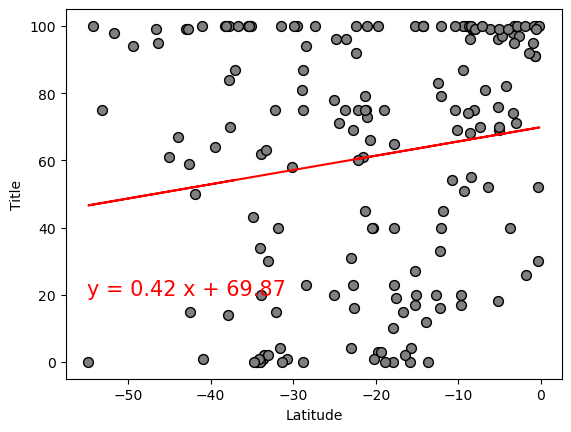

In [57]:
x_values = southernHemDF["Lat"]
y_values = southernHemDF ["Cloudiness"]
plot_linear_regression(x_values,y_values, "Humidity", (-55,20), "gray")

**Discussion about the linear relationship:** The low r values indicate a weak positive relationship between latitude and cloudiness.


### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.05103908342604685


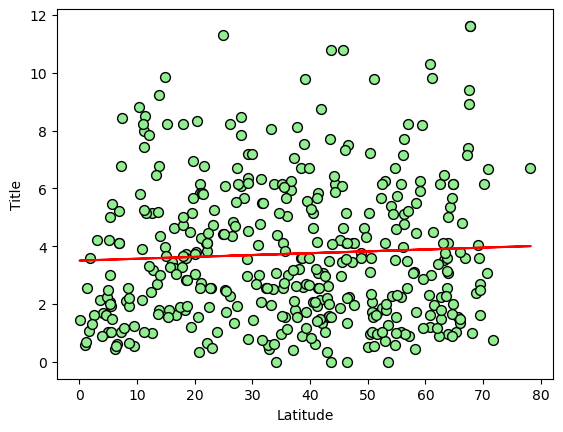

In [60]:
x_values = northernHemDF["Lat"]
y_values = northernHemDF["Wind Speed"]
plot_linear_regression(x_values,y_values, "Wind Speed", (40,25), "lightgreen")

The r-squared is: -0.061804214564567556


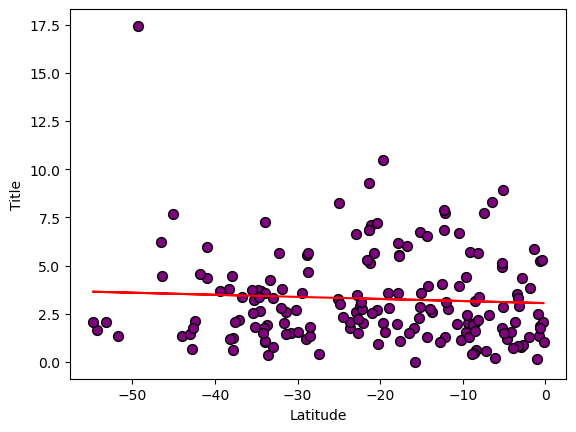

In [62]:
x_values = southernHemDF ["Lat"]
y_values = southernHemDF ["Wind Speed"]
plot_linear_regression(x_values,y_values, "Wind Speed", (-30,30), "purple")

**Discussion about the linear relationship:** The low r values indicate a weak positive relationship between latitude and wind speed.